 # Problem statement



 * This dataset comprises used cars sold in India as well as important features of these cars.

 * Here, users can predict the price of the car based on input features.

 * Prediction results can be used to give new sellers the price suggestion based on market conditions.

 # Importing necessary libraries

In [1]:
# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from six.moves import urllib
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


 # Data Collection

In [2]:
# %%
download_dir ="./data/"
download_url = "https://raw.githubusercontent.com/mohitmahiyt/CarPricePredictionDataset/main/cars_dataset.csv"
os.makedirs(download_dir, exist_ok=True)
file_name = os.path.basename(download_url)
download_file = os.path.join(download_dir, file_name)
urllib.request.urlretrieve(download_url, download_file)


('./data/cars_dataset.csv', <http.client.HTTPMessage at 0x1692316d0>)

 # Data read from local machine

In [3]:
# %%
df = pd.read_csv(download_file)
df


,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,1,Maruti Alto,Maruti,Alto,9,53800,Dealer,CNG,Manual,26.83,796,38.4,5,235000
1,2,Maruti Alto,Maruti,Alto,11,11000,Dealer,CNG,Manual,26.83,796,38.4,5,185000
2,3,Maruti Alto,Maruti,Alto,11,80000,Dealer,CNG,Manual,26.83,796,38.4,5,150000
3,4,Maruti Alto,Maruti,Alto,10,57000,Dealer,CNG,Manual,26.83,796,38.4,5,172000
4,5,Maruti Alto,Maruti,Alto,11,72000,Individual,CNG,Manual,26.83,796,38.4,5,125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,30016,Bentley Continental,Bentley,Continental,10,30000,Dealer,Petrol,Automatic,8.60,5998,552.0,4,8100000
15407,30017,Rolls-Royce Ghost,Rolls-Royce,Ghost,4,5000,Individual,Petrol,Automatic,10.20,6592,563.0,4,24200000
15408,30018,Bentley Continental,Bentley,Continental,9,37500,Dealer,Petrol,Automatic,6.00,5998,600.0,5,5200000
15409,30019,Ferrari GTC4Lusso,Ferrari,GTC4Lusso,2,3800,Dealer,Petrol,Automatic,4.00,3855,601.0,4,39500000


In [4]:
# %%
df["Unnamed: 0"] = range(1,len(df)+1)
df.rename(columns={'Unnamed: 0': "car_id"}, inplace=True)

# Separate the dataset into three tables
car_info = df[["car_id",'car_name', 'brand', 'model', 'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power', 'seats']]
car_usage = df[['car_id', 'vehicle_age', 'km_driven', 'seller_type']]
car_selling_price = df[['car_id', 'selling_price']]

# Save each table to separate CSV files
car_info.to_csv('car_info.csv', index=False)
car_usage.to_csv('car_usage.csv', index=False)
car_selling_price.to_csv('car_selling_price.csv', index=False)

df = df.drop("car_id", axis=1)


 # Exploratory Data Analysis (EDA)

In [5]:
# %%
# Numeric and categorical features
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print(f'We have {len(numeric_features)} numerical features : {numeric_features}')
print(f'We have {len(categorical_features)} categorical features : {categorical_features}')


We have 7 numerical features : ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']
We have 6 categorical features : ['car_name', 'brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']


 ## Univariate Analysis

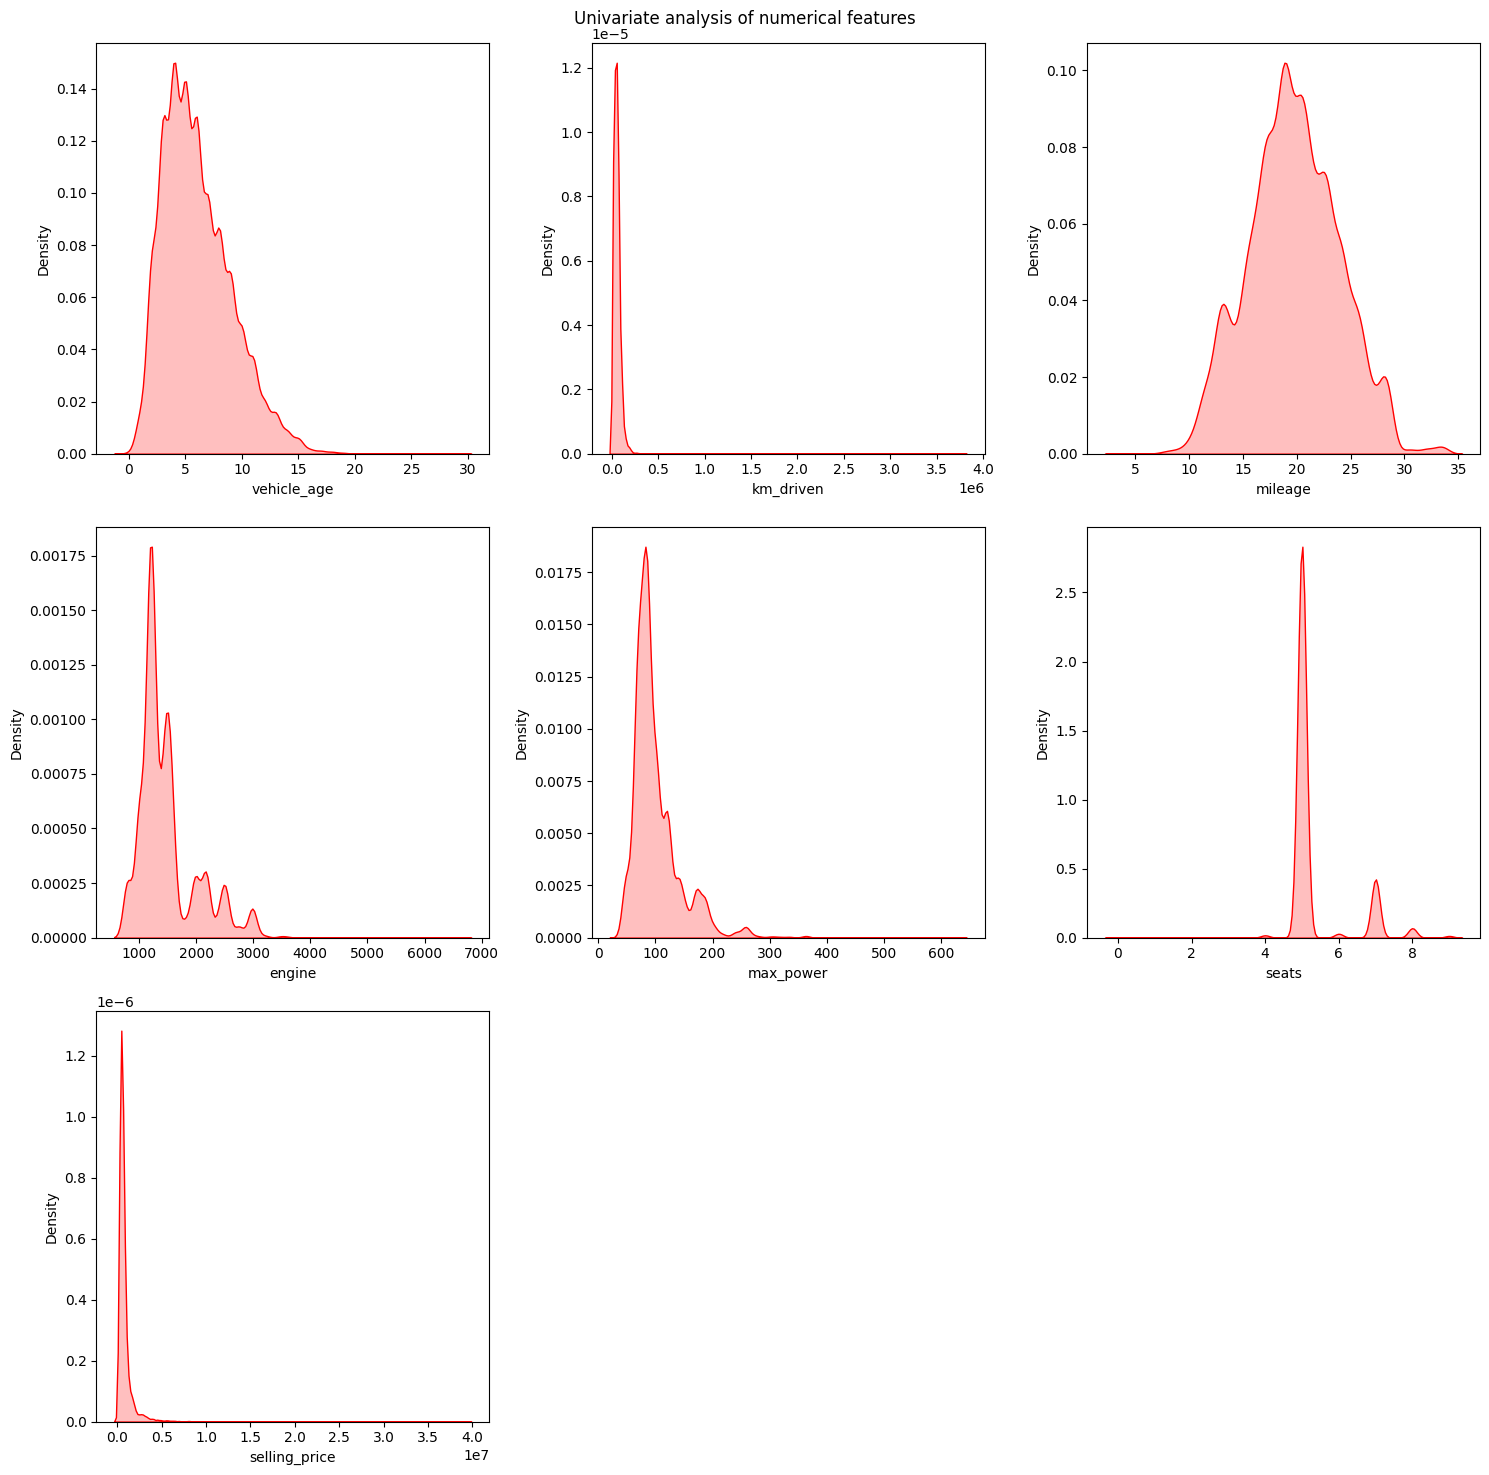

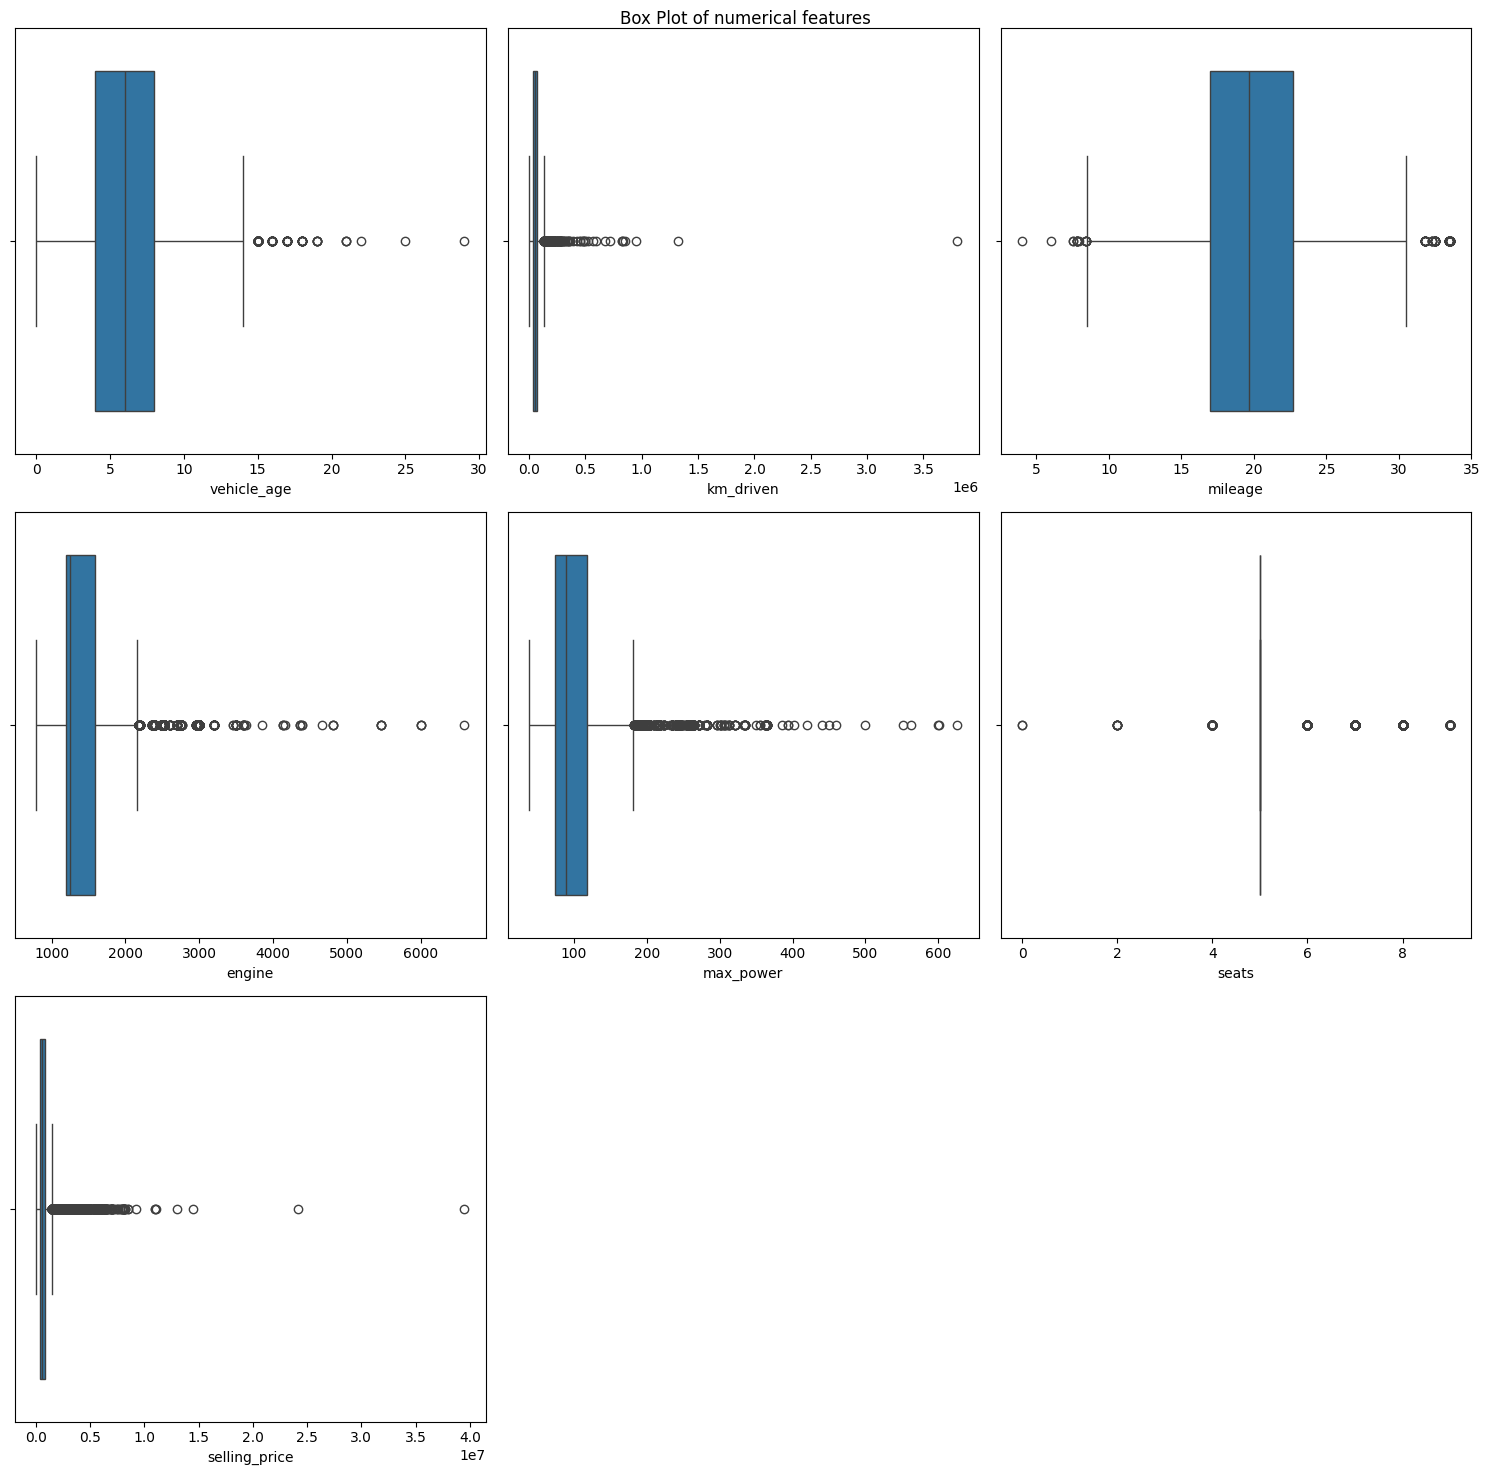

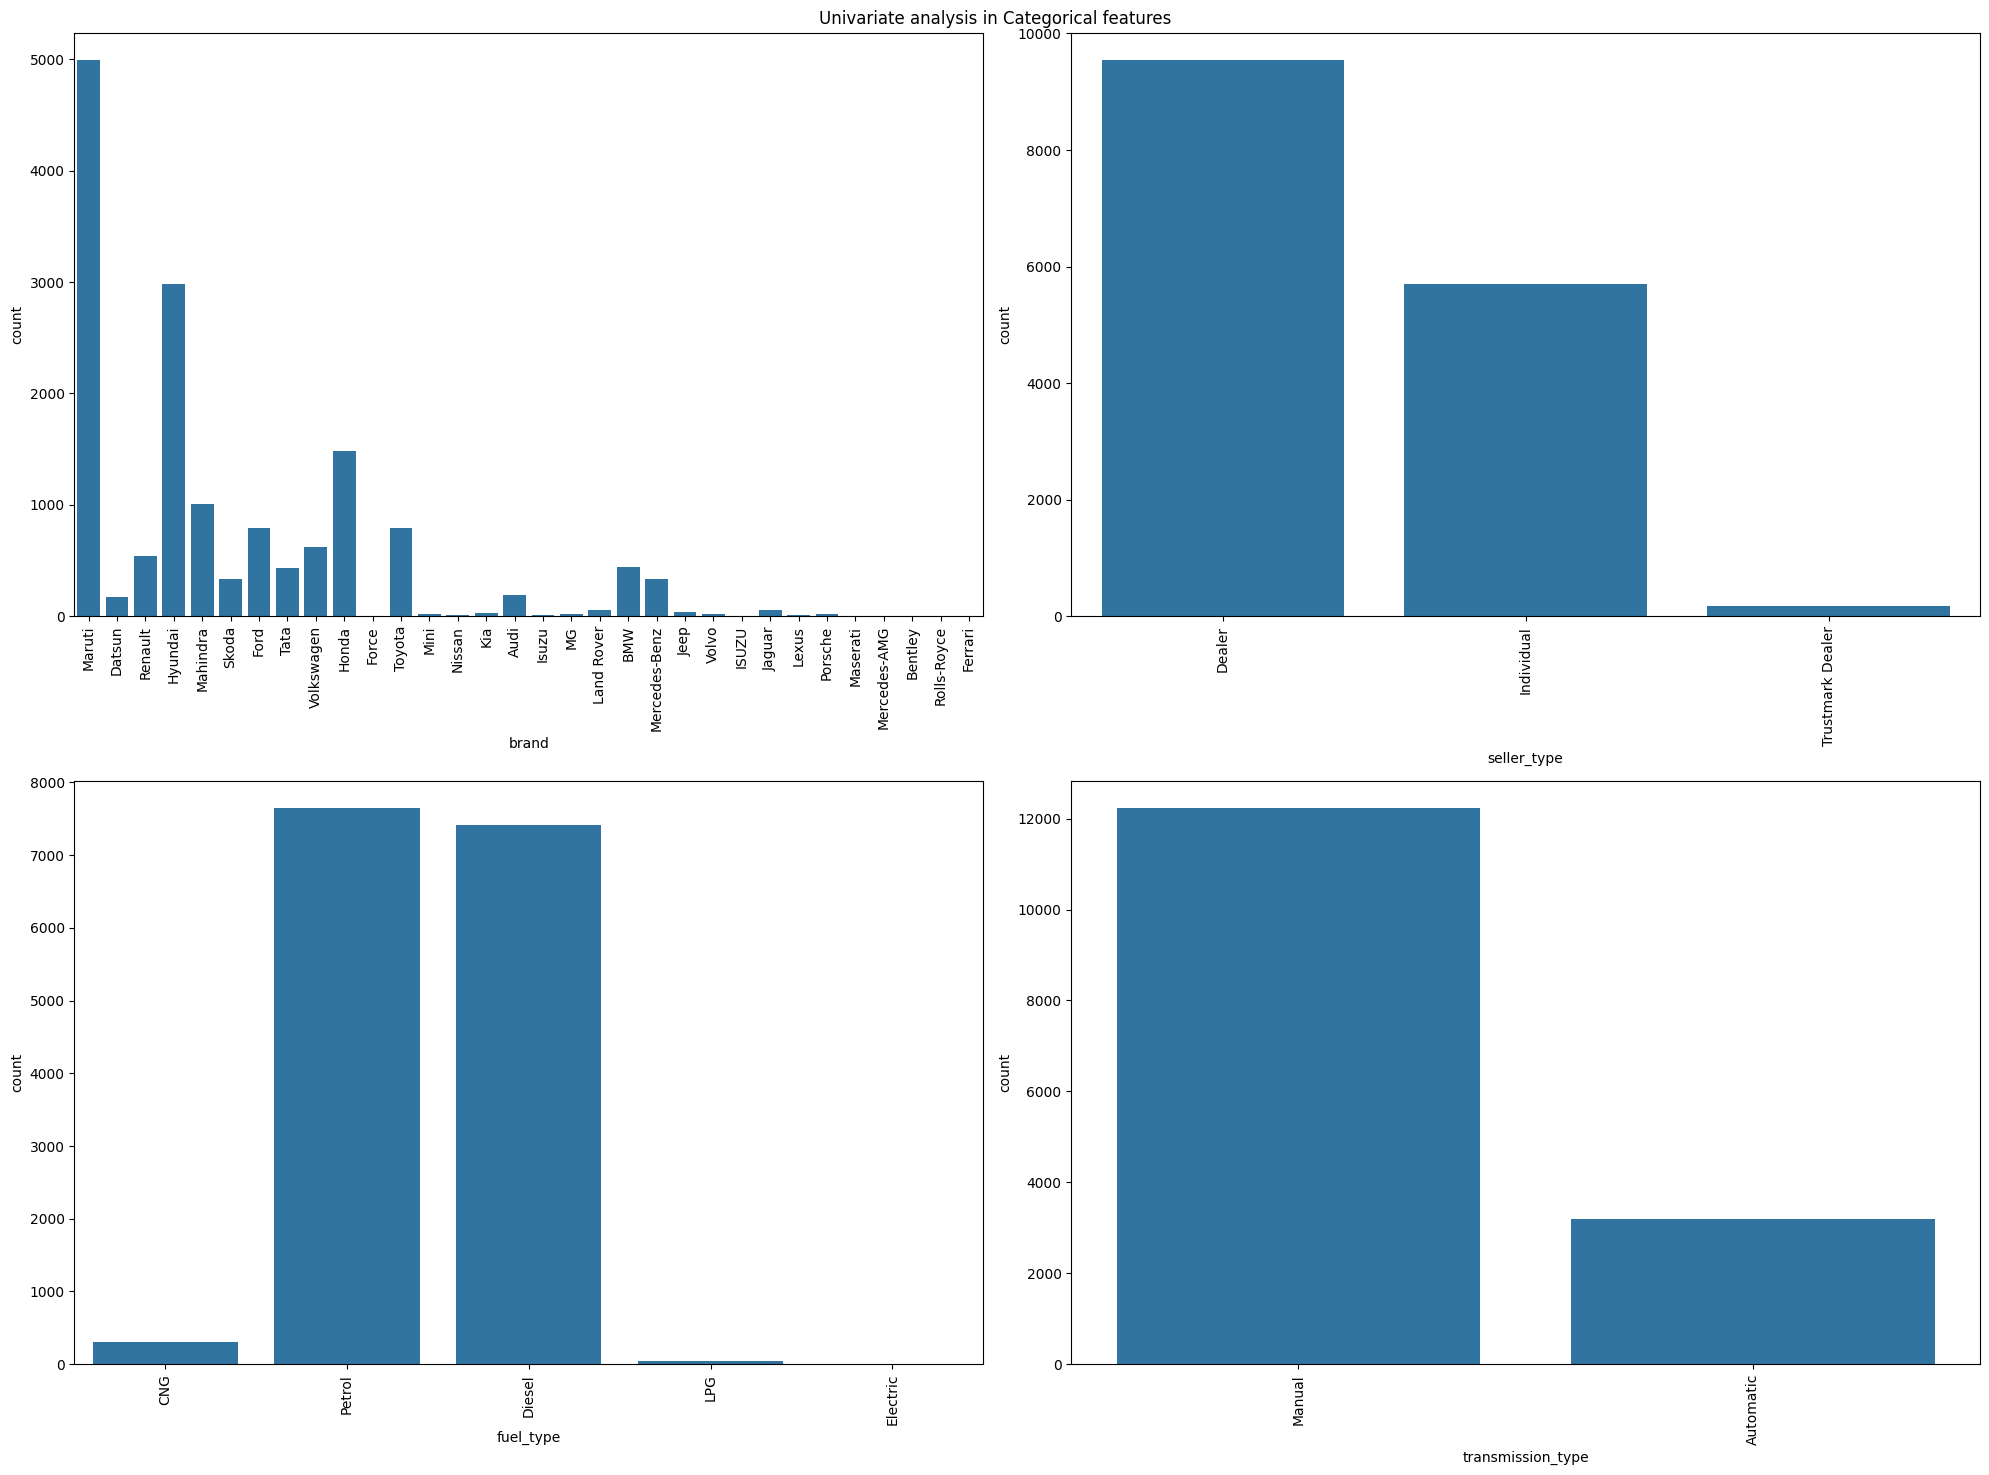

In [6]:
# %%
# Numerical features
plt.figure(figsize=(15,15))
plt.suptitle("Univariate analysis of numerical features")
for i in range(len(numeric_features)):
    plt.subplot(3,3,i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='r', shade=True)
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

plt.figure(figsize=(15,15))
plt.suptitle("Box Plot of numerical features")
for i in range(len(numeric_features)):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=df[numeric_features[i]])
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

# Categorical features
plt.figure(figsize= (20,15))
plt.suptitle("Univariate analysis in Categorical features")
cat = ["brand", "seller_type", "fuel_type", "transmission_type"]
for i in range(len(cat)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[cat[i]])
    plt.xticks(rotation=90)
    plt.xlabel(cat[i])
    plt.tight_layout()


 ## Multivariate Analysis

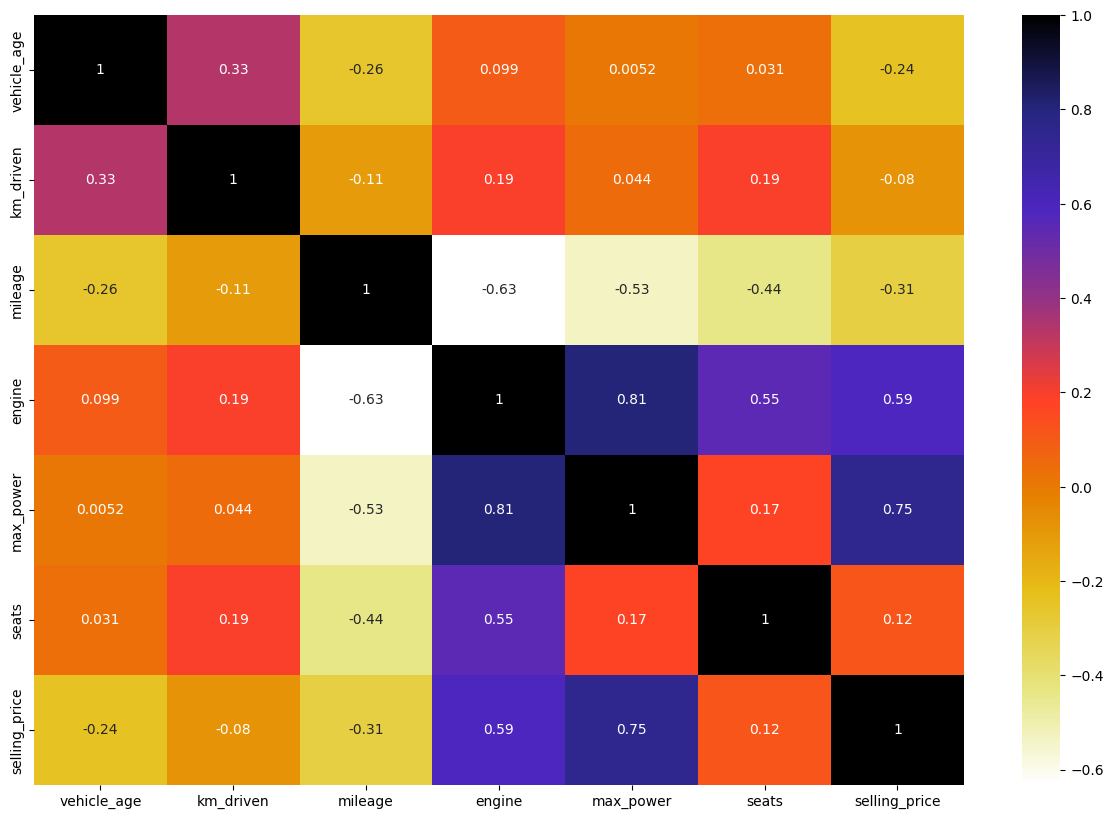

In [7]:
# %%
plt.figure(figsize = (15,10))
sns.heatmap(df[numeric_features].corr(), cmap="CMRmap_r", annot=True)
plt.show()


 # Checking the Outliers

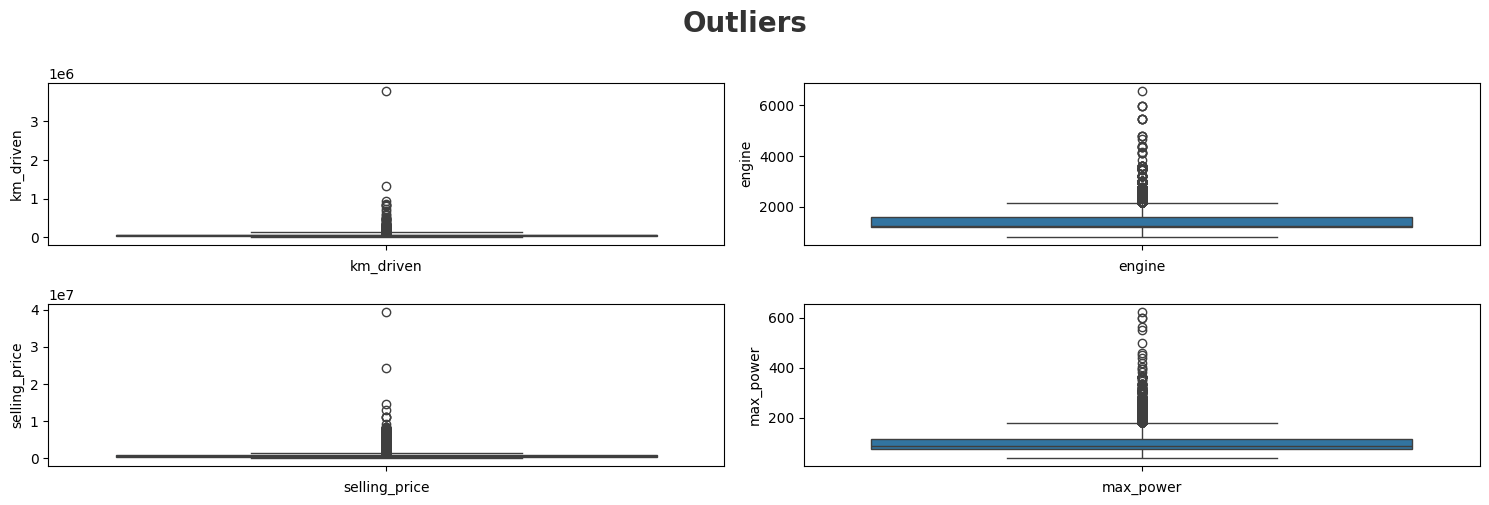

In [8]:
# %%
plt.figure(figsize=(15,5))
plt.suptitle("Outliers", fontsize=20, fontweight="bold", alpha=0.8, y=1)
outliers = ['km_driven', 'engine', 'selling_price', 'max_power']
for i in range(len(outliers)):
    plt.subplot(2,2,i+1)
    sns.boxplot(df[outliers[i]])
    plt.xlabel(outliers[i])
    plt.tight_layout()


 ## Outlier Detection and Removal using IQR

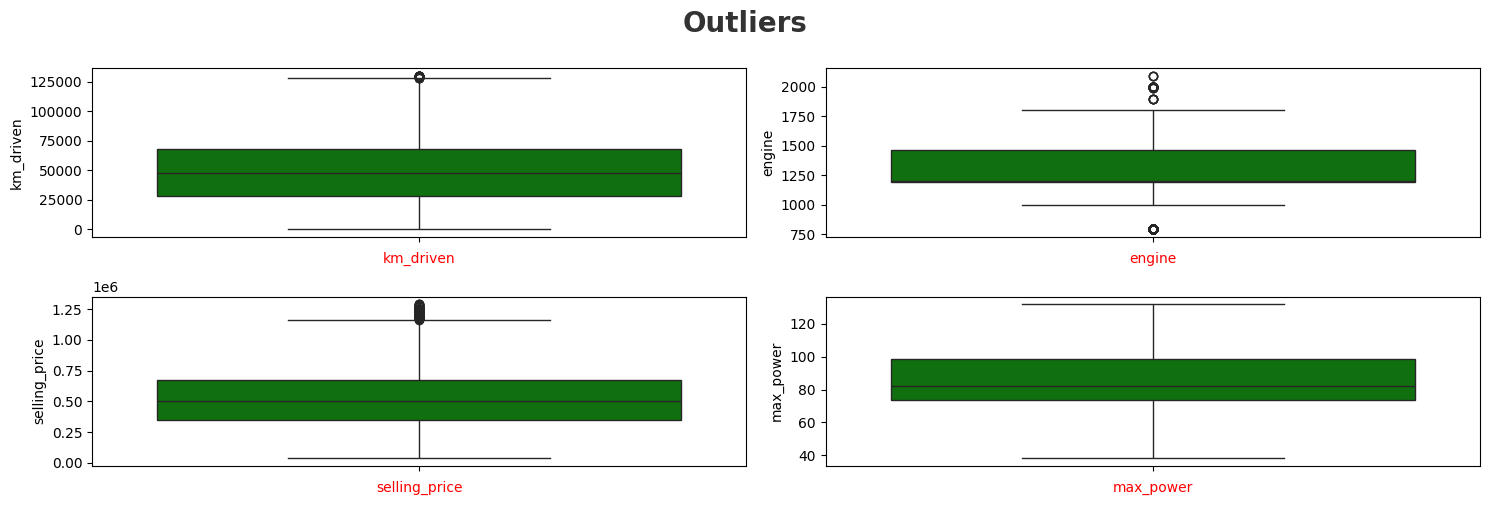

In [9]:
# %%
def outlier_detection_and_removal(df, col_name):
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    df = df[(df[col_name] >= lower_limit) & (df[col_name] <= upper_limit)]
    return df

df_cleaned = df.copy()
for col in outliers:
    df_cleaned = outlier_detection_and_removal(df_cleaned, col)

df_cleaned.reset_index(drop=True, inplace=True)
df_cleaned.to_csv("cleaned_cars.csv", index=False)

# Checking the Box plot after removing outliers
plt.figure(figsize=(15,5))
plt.suptitle("Outliers", fontsize=20, fontweight="bold", alpha=0.8, y=1)
for i in range(len(outliers)):
    plt.subplot(2,2,i+1)
    sns.boxplot(df_cleaned[outliers[i]], color='green')
    plt.xlabel(outliers[i], color='r')
    plt.tight_layout()


 # Feature Engineering

<Axes: >

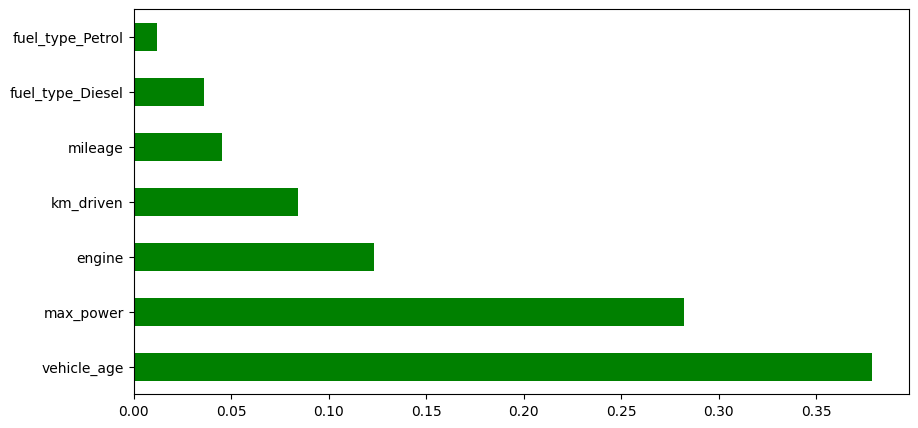

In [10]:
# %%
df_model = df_cleaned.copy()
df_model.drop(labels=['car_name', 'brand', 'model'], axis=1, inplace=True)

# Converting categorical data to numerical using One Hot Encoding
df_model = pd.get_dummies(df_model, dtype='float')

# Creating Feature Matrix (independent variable) & Target variable (dependent variable)
X = df_model.drop('selling_price', axis=1) # independent variable
y = df_model['selling_price'] # target variable

# Checking important features
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X, y)

# Visualization for feature importance
imp_features = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
imp_features.nlargest(7).plot(kind='barh', color='g')


 # Model Building and Evaluation

In [11]:
# %%
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

models = [LinearRegression(), SVR(), DecisionTreeRegressor(), RandomForestRegressor(), Ridge(), Lasso()]
model_names = ['Linear Regression', 'Support Vector Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'Ridge', 'Lasso']

results = []
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    evs = explained_variance_score(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    results.append([name, mse, rmse, evs, r2])

# Creating DataFrame for model comparison
ML_model_df = pd.DataFrame(results, columns=["Model", "Mean Squared Error", "Root Mean Squared Error", "Explained Variance Score", "R-Squared Score"])
ML_model_df.set_index("Model", inplace=True)
ML_model_df






,Mean Squared Error,Root Mean Squared Error,Explained Variance Score,R-Squared Score
Model,,,,
Linear Regression,1.425031e+10,119374.649507,0.734849,0.734808
Support Vector Regression,5.444609e+10,233336.867996,0.000840,-0.013218
Decision Tree Regressor,1.001856e+10,100092.740377,0.813616,0.813559
Random Forest Regressor,6.686550e+09,81771.329069,0.875691,0.875566
Ridge,1.425029e+10,119374.570870,0.734850,0.734808
Lasso,1.425033e+10,119374.735029,0.734849,0.734808


In [ ]:
# Final cross-validation for the best model
cv_scores = cross_val_score(best_model, X, y, cv=10, 
scoring='neg_mean_squared_error')
print(f"Random Forest Regression: Mean Squared Error = 
{-cv_scores.mean()} ± {cv_scores.std()}")
